In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [136]:
df=pd.read_csv("dirty_iris.csv")

In [137]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


In [138]:
print(df['Sepal.Length'].unique())
print(df['Sepal.Width'].unique())
print(df['Petal.Length'].unique())
print(df['Petal.Width'].unique())


[ 6.4  6.3  6.2  5.   5.7  5.3  5.9  5.8  4.8  6.   6.8  nan  5.5  4.7
  5.6  4.9  5.4  6.7  4.6 73.   6.5  4.4  6.6  0.   7.7  7.   5.2  5.1
  7.4  4.3  7.2  6.1  6.9  7.6  7.9  4.5 49. ]
[ 3.2  3.3  nan  3.4  2.6  2.7  3.   3.1  3.5  2.8  3.9 -3.   4.   3.6
 29.   2.9  2.2  2.5  4.2  3.8  2.3  3.7  4.1 30.   0. ]
[ 4.5    6.     5.4    1.6    3.5      nan  5.3    5.1    4.1    4.8
  1.7    4.     1.3    4.2    5.7    5.9    1.4    1.5   63.     0.82
 23.     5.5    5.8    1.2    3.9    6.7    4.7    4.4    5.6    3.3
  6.1    1.1    4.9    4.6    6.6    0.     6.4    5.2    1.9    4.3
  5.     0.925  6.9   14.     3.6    3.8  ]
[1.5 2.5 2.3 0.4 1.  0.2 nan 1.8 0.6 1.6 1.4 1.3 0.1 2.1 2.  1.2 1.9 2.2
 0.3 1.1 inf 1.7 2.4 0.5]


In [139]:
df.notnull().sum()


Sepal.Length    140
Sepal.Width     133
Petal.Length    131
Petal.Width     138
Species         150
dtype: int64

In [140]:
df = df.replace(np.inf,np.nan)
df = df.replace('?',np.nan)
df = df.replace('#',np.nan)
df.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


In [141]:
total = df.shape[0]
total

150

In [142]:
complete = (df.isnull().any(axis=1) == 0).sum()
complete

95

In [143]:
percentage = (complete/total)*100
percentage


63.33333333333333

In [144]:
print(df['Petal.Length'].unique())
print(df['Sepal.Width'].unique())


[ 4.5    6.     5.4    1.6    3.5      nan  5.3    5.1    4.1    4.8
  1.7    4.     1.3    4.2    5.7    5.9    1.4    1.5   63.     0.82
 23.     5.5    5.8    1.2    3.9    6.7    4.7    4.4    5.6    3.3
  6.1    1.1    4.9    4.6    6.6    0.     6.4    5.2    1.9    4.3
  5.     0.925  6.9   14.     3.6    3.8  ]
[ 3.2  3.3  nan  3.4  2.6  2.7  3.   3.1  3.5  2.8  3.9 -3.   4.   3.6
 29.   2.9  2.2  2.5  4.2  3.8  2.3  3.7  4.1 30.   0. ]


In [145]:
df1 = pd.DataFrame()


In [146]:
df1['r1'] = df['Species'].apply(lambda x : True if x in['setosa','versicolor','virginica'] else False)


In [147]:
(df.drop('Species', axis=1) < 0).sum(axis=1) > 0

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [148]:
df_without_s = df.drop(columns=['Species'])
print(df_without_s)


     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0             6.4          3.2           4.5          1.5
1             6.3          3.3           6.0          2.5
2             6.2          NaN           5.4          2.3
3             5.0          3.4           1.6          0.4
4             5.7          2.6           3.5          1.0
..            ...          ...           ...          ...
145           6.7          3.1           5.6          2.4
146           5.6          3.0           4.5          1.5
147           5.2          3.5           1.5          0.2
148           6.4          3.1           NaN          1.8
149           5.8          2.6           4.0          NaN

[150 rows x 4 columns]


In [149]:
df1['r2'] = df_without_s.applymap(lambda x: True if x >= 0 else False).all(axis= 1)

In [150]:
df_without_s[df_without_s > 0]


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,6.4,3.2,4.5,1.5
1,6.3,3.3,6.0,2.5
2,6.2,NaN,5.4,2.3
3,5.0,3.4,1.6,0.4
4,5.7,2.6,3.5,1.0
...,...,...,...,...
145,6.7,3.1,5.6,2.4
146,5.6,3.0,4.5,1.5
147,5.2,3.5,1.5,0.2
148,6.4,3.1,NaN,1.8


In [151]:
df1['r3'] = df.apply(lambda x : True if x['Petal.Length'] >= 2 * x['Petal.Width'] else False, axis=1)

In [152]:
df1['r4'] = df['Sepal.Length'].apply(lambda x: True if x <= 30 else False)
df1['r5']= df.apply(lambda x: True if x["Sepal.Length"]< x['Petal.Length'] else False, axis=1)
df1.head()

,r1,r2,r3,r4,r5
0,True,True,True,True,False
1,True,True,True,True,False
2,True,False,True,True,False
3,True,True,True,True,False
4,True,True,True,True,False


In [153]:
df_without_s.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  140 non-null    float64
 1   Sepal.Width   133 non-null    float64
 2   Petal.Length  131 non-null    float64
 3   Petal.Width   137 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [154]:
df1.describe()

,r1,r2,r3,r4,r5
count,150,150,150,150,150
unique,1,2,2,2,2
top,True,True,True,True,False
freq,150,94,116,138,148


<BarContainer object of 5 artists>

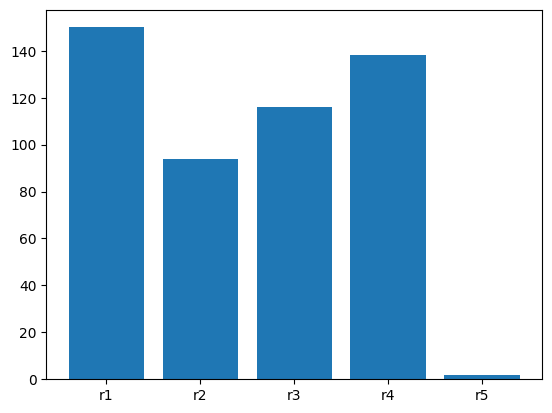

In [155]:
import matplotlib.pyplot as plt
plt.bar(df1.columns, df1.sum())


<Axes: >

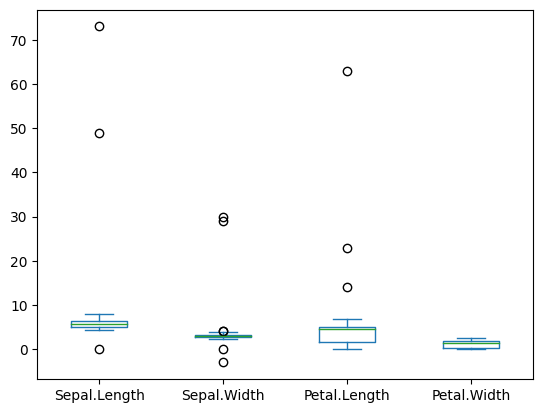

In [156]:
plt.bar
df.iloc[:, :-1].plot(kind = 'box')


In [157]:
import plotly.express as px
px.box(df["Sepal.Length"])

In [158]:
summary = {
'r1' : len(df1) - df1['r1'].sum(),
'r2' : len(df1) - df1['r2'].sum(),
'r3' : len(df1) - df1['r3'].sum(),
'r4' : len(df1) - df1['r4'].sum(),
'r5' : len(df1) - df1['r5'].sum()
}


In [159]:
df2 = pd.DataFrame(data=pd.Series(summary) , columns=['count'])
df2

,count
r1,0
r2,56
r3,34
r4,12
r5,148


In [160]:
df['Sepal.Length'].describe()

count    140.000000
mean       6.559286
std        6.800940
min        0.000000
25%        5.100000
50%        5.750000
75%        6.400000
max       73.000000
Name: Sepal.Length, dtype: float64